# Online Payment Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
os.getcwd()

'C:\\Users\\sushm\\PGA36\\Projects\\Capstone Project 2'

In [101]:
df=pd.read_csv("OnlinePaymentFraudDetection.csv")

In [102]:
df

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Phone number
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,NaN
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,NaN
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,NaN
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,NaN
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6520934,CASH_OUT,358813.24,C2036498119,0.00,0.00,C710630079,465303.20,824116.44,0,0,NaN
6520935,PAYMENT,14600.84,C560694267,0.00,0.00,M1414105232,0.00,0.00,0,0,NaN
6520936,CASH_IN,198382.93,C1719569105,3302358.14,3500741.07,C1453010035,1664291.22,1465908.29,0,0,NaN
6520937,CASH_OUT,72663.24,C1180784164,30568.30,0.00,C1749299393,1362688.45,1435351.69,0,0,NaN


# Basic Understanding of the data

In [103]:
df.shape

(6520939, 11)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6520939 entries, 0 to 6520938
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   nameOrig        object 
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        object 
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
 10  Phone number    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 547.3+ MB


In [105]:
df.duplicated().sum()

157973

In [106]:
df.isnull().sum()

type                    0
amount                 36
nameOrig                0
oldbalanceOrg           0
newbalanceOrig          0
nameDest             2931
oldbalanceDest          0
newbalanceDest       1365
isFraud                 0
isFlaggedFraud          0
Phone number      6520939
dtype: int64

In [107]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Phone number
count,6.520903e+06,6.520939e+06,6.520939e+06,6.520939e+06,6.519574e+06,6.520939e+06,6.520939e+06,0.0
mean,1.798391e+05,8.337411e+05,8.549820e+05,1.100622e+06,1.224912e+06,1.290612e-03,2.606987e-06,NaN
std,6.027683e+05,2.887981e+06,2.923787e+06,3.397994e+06,3.672263e+06,3.590190e-02,1.614615e-03,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,1.339081e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,7.489012e+04,1.420500e+04,0.000000e+00,1.327880e+05,2.146959e+05,0.000000e+00,0.000000e+00,NaN
75%,2.087083e+05,1.073087e+05,1.442916e+05,9.430922e+05,1.112007e+06,0.000000e+00,0.000000e+00,NaN
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,NaN


In [108]:
df.describe(include="object")

,type,nameOrig,nameDest
count,6520939,6520939,6518008
unique,5,6353307,2721438
top,CASH_OUT,C1170262181,C1286084959
freq,2293271,4,117


In [109]:
for i in df.columns:
    print(i,"Value_counts::",df[i].value_counts())
    print("\n")

type Value_counts:: type
CASH_OUT    2293271
PAYMENT     2204856
CASH_IN     1434374
TRANSFER     546028
DEBIT         42410
Name: count, dtype: int64


amount Value_counts:: amount
10000000.00    3293
10000.00         88
5000.00          79
15000.00         71
500.00           67
               ... 
723731.90         1
1321893.03        1
630562.27         1
173661.39         1
190105.00         1
Name: count, Length: 5316871, dtype: int64


nameOrig Value_counts:: nameOrig
C1170262181    4
C784063580     4
C838212175     4
C1464178593    4
C1832548028    4
              ..
C1725421506    1
C748448601     1
C291134678     1
C2087582731    1
C1280323807    1
Name: count, Length: 6353307, dtype: int64


oldbalanceOrg Value_counts:: oldbalanceOrg
0.00         2154702
133.00           937
184.00           934
181.00           931
109.00           930
              ...   
62771.35           1
28105.41           1
7591.02            1
19917.40           1
641239.85          1
Name: count, L

#### The target variable "isFraud" highly imbalanced.

# EDA and Preprocessing

In [110]:
df

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Phone number
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,NaN
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,NaN
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,NaN
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,NaN
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6520934,CASH_OUT,358813.24,C2036498119,0.00,0.00,C710630079,465303.20,824116.44,0,0,NaN
6520935,PAYMENT,14600.84,C560694267,0.00,0.00,M1414105232,0.00,0.00,0,0,NaN
6520936,CASH_IN,198382.93,C1719569105,3302358.14,3500741.07,C1453010035,1664291.22,1465908.29,0,0,NaN
6520937,CASH_OUT,72663.24,C1180784164,30568.30,0.00,C1749299393,1362688.45,1435351.69,0,0,NaN


## Treating Null Values

In [111]:
df.isnull().sum()

type                    0
amount                 36
nameOrig                0
oldbalanceOrg           0
newbalanceOrig          0
nameDest             2931
oldbalanceDest          0
newbalanceDest       1365
isFraud                 0
isFlaggedFraud          0
Phone number      6520939
dtype: int64

### As Phone number has highest null values its better to drop the column

In [112]:
df.drop("Phone number",axis=1,inplace=True)

### As nameDest and newbalanceDest has only feww nulls filling it with fillna

In [113]:
a=df["nameDest"].mode()[0]

In [114]:
df["nameDest"].fillna(a,inplace=True)

In [115]:
b=df["newbalanceDest"].mean()
b

1224912.23854563

In [116]:
df["newbalanceDest"].fillna(b,inplace=True)

### Dropping nulls thatare very less 

In [117]:
df.dropna(inplace=True)

In [118]:
df.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Dropping duplicates

In [119]:
df.duplicated().sum()

157973

In [120]:
df.drop_duplicates(inplace=True)

In [121]:
df.duplicated().sum()

0

### Removing noise from the data

In [122]:
df1=df
df11 = df1[(df1['amount'] > df1['oldbalanceOrg']) & (df1['type'] != 'CASH_IN') & (df1['isFraud']!=1)]
df11

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
8,PAYMENT,4024.36,C1265012928,2671.0,0.0,M1176932104,0.00,0.000000e+00,0,0
10,DEBIT,9644.94,C1900366749,4465.0,0.0,C997608398,10845.00,1.579821e+05,0,0
13,PAYMENT,11633.76,C1716932897,10127.0,0.0,M801569151,0.00,0.000000e+00,0,0
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.00,5.151344e+04,0,0
16,PAYMENT,1563.82,C761750706,450.0,0.0,M1731217984,0.00,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...
6515778,CASH_OUT,140781.78,C1765291442,392.0,0.0,C2116445759,0.00,1.407818e+05,0,0
6515832,CASH_OUT,119209.37,C1247814656,11103.0,0.0,C1286084959,0.00,1.192094e+05,0,0
6517073,CASH_OUT,79572.93,C325353437,0.0,0.0,C1286084959,289556.82,1.224912e+06,0,0
6519418,TRANSFER,526356.20,C43223394,0.0,0.0,C1286084959,1744901.33,2.271258e+06,0,0


lets drop the noise

In [123]:
df2=df1.drop(df11.index)

In [124]:

df2

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
6512495,PAYMENT,6422.06,C1000286086,189855.50,183433.44,M1796073105,0.00,0.00,0,0
6512949,PAYMENT,25794.28,C1302631474,30947.00,5152.72,M35309229,0.00,0.00,0,0
6516919,CASH_OUT,363426.42,C1427132210,556480.80,193054.38,C738908999,0.00,363426.42,0,0
6517515,CASH_IN,187467.87,C2135074293,9378445.42,9565913.29,C316386242,724680.75,537212.88,0,0


Now after removing noise my dataset has 2761105 rows

Lets clean the noise further

In [125]:
df22=pd.DataFrame(df2)
res_df= df22[(df22['oldbalanceDest']>df22['newbalanceDest']) & (df2['isFraud']!=1)]
res_df

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
9,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0
21,DEBIT,9302.79,C1566511282,11299.00,1996.21,C1973538135,29832.00,16896.70,0,0
22,DEBIT,1065.41,C1959239586,1817.00,751.59,C515132998,10330.00,0.00,0,0
41,DEBIT,5758.59,C1466917878,32604.00,26845.41,C1297685781,209699.00,16997.22,0,0
59,DEBIT,5529.13,C867288517,8547.00,3017.87,C242131142,10206.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
6496787,CASH_IN,83322.76,C2007826656,0.00,83322.76,C659637856,86482.34,3159.58,0,0
6499933,CASH_IN,314087.92,C1443351734,29505.00,343592.92,C1702939487,584669.69,271295.15,0,0
6501658,CASH_IN,203130.92,C1964474229,110705.40,313836.32,C1267109153,245506.91,42375.99,0,0
6507463,CASH_IN,40611.80,C308228633,872.00,41483.80,C1757288527,45048.77,4436.96,0,0


In [126]:
final_df = df22.drop(res_df.index)
final_df

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.00,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.00,0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
6508813,PAYMENT,16055.00,C318844137,42946.0,26891.00,M414528727,0.0,0.00,0,0
6512495,PAYMENT,6422.06,C1000286086,189855.5,183433.44,M1796073105,0.0,0.00,0,0
6512949,PAYMENT,25794.28,C1302631474,30947.0,5152.72,M35309229,0.0,0.00,0,0
6516919,CASH_OUT,363426.42,C1427132210,556480.8,193054.38,C738908999,0.0,363426.42,0,0


Now, our final cleaned data consists of 1559579 rows of data

In [127]:
final_df=final_df.reset_index(drop=True)

In [128]:
final_df

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.00,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.00,0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
1559798,PAYMENT,16055.00,C318844137,42946.0,26891.00,M414528727,0.0,0.00,0,0
1559799,PAYMENT,6422.06,C1000286086,189855.5,183433.44,M1796073105,0.0,0.00,0,0
1559800,PAYMENT,25794.28,C1302631474,30947.0,5152.72,M35309229,0.0,0.00,0,0
1559801,CASH_OUT,363426.42,C1427132210,556480.8,193054.38,C738908999,0.0,363426.42,0,0


### Dropping columns nameOrig and nameDest because names does not influence our predictions

In [129]:
final_df.drop(["nameOrig","nameDest"],axis=1,inplace=True)

## EDA

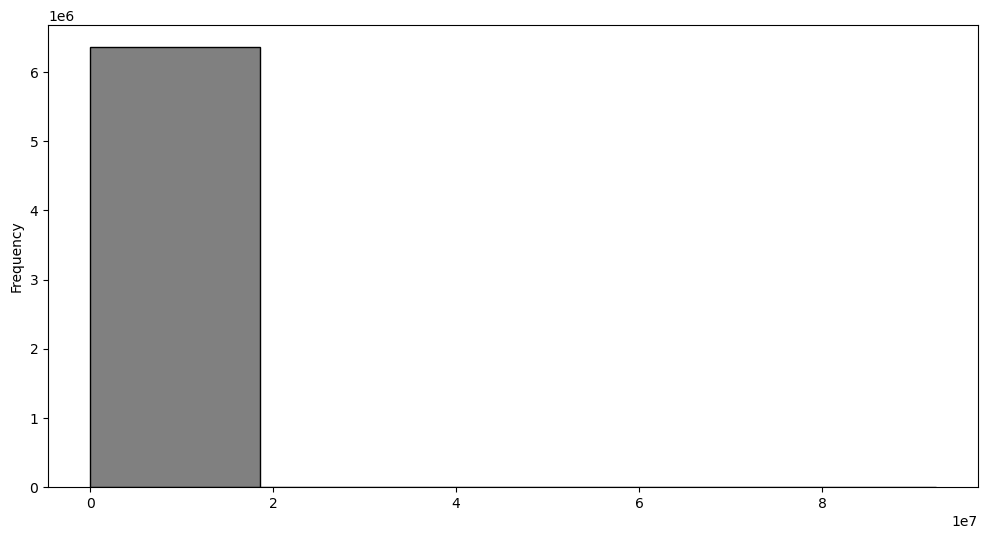

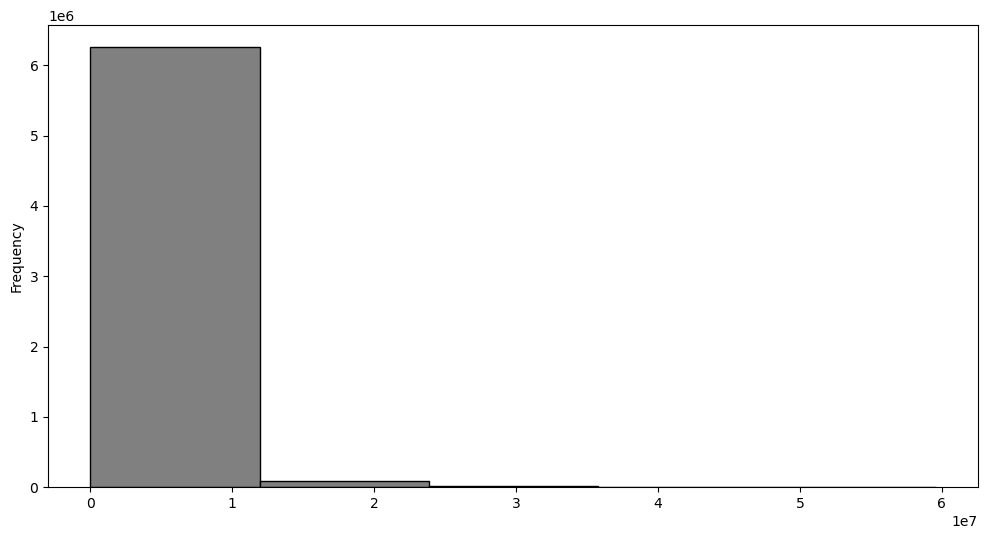

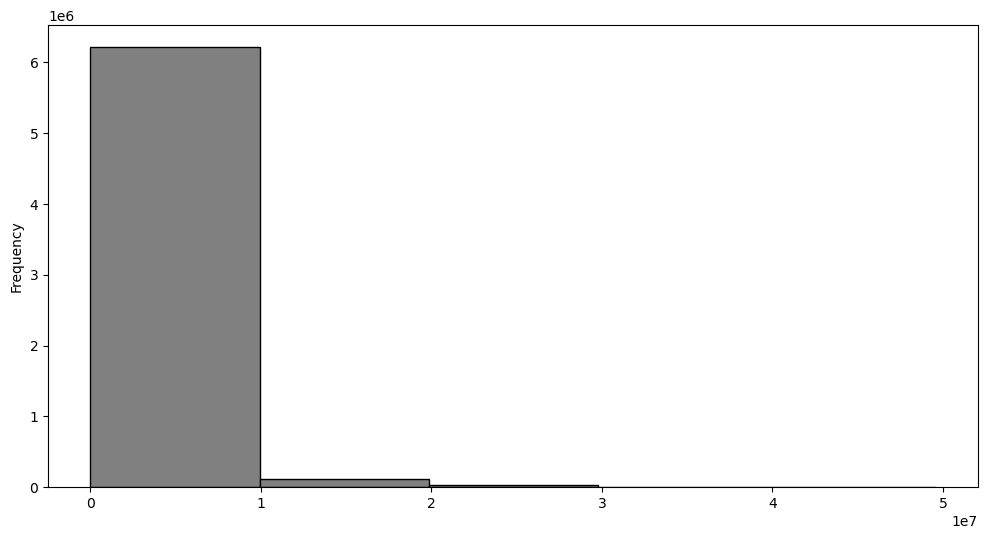

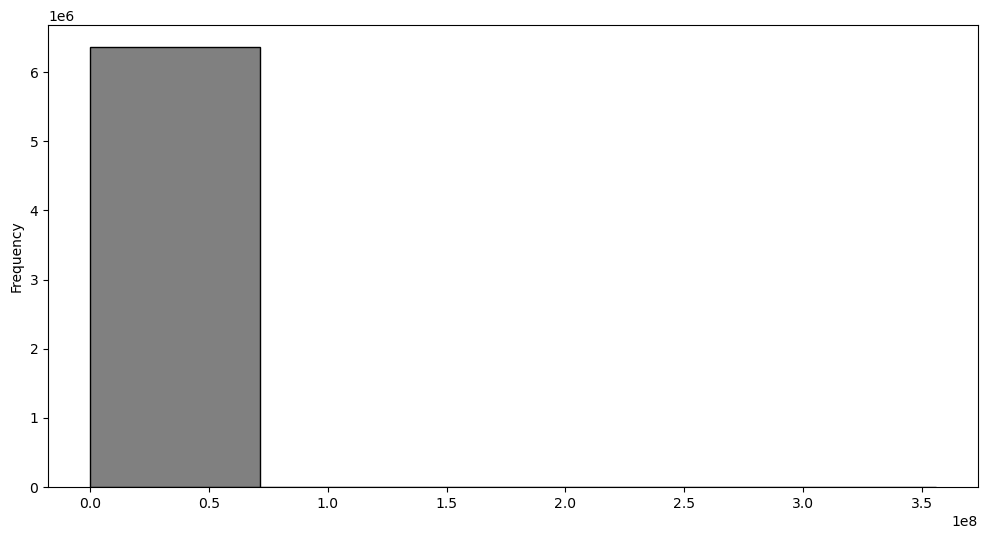

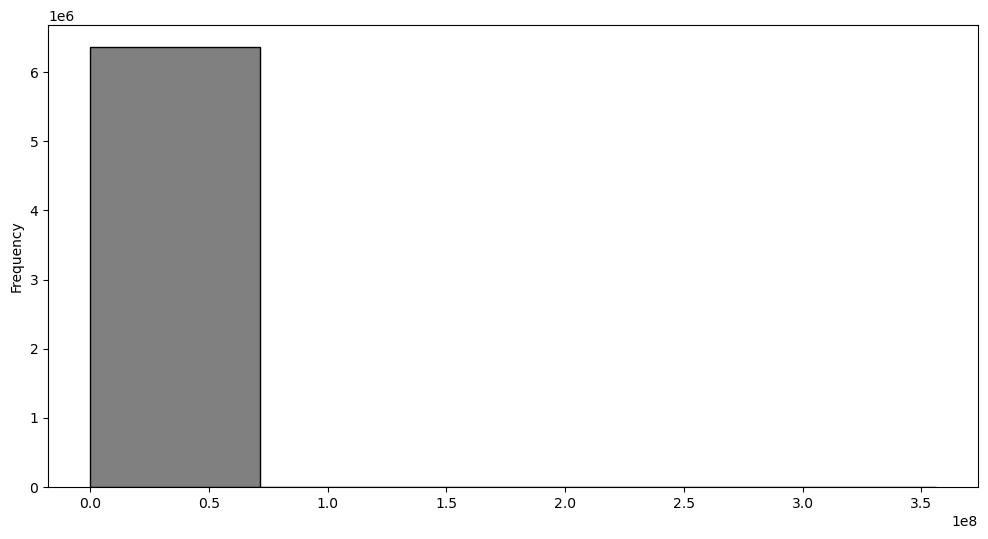

In [130]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

We could see some outliers Lets work on it

In [131]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    print(i)
    print(df[i].quantile(0.10))
    print(df[i].quantile(0.90))

    print('\n')

amount
4501.4
365423.03300000005


oldbalanceOrg
0.0
1822445.6880000038


newbalanceOrig
0.0
1970291.441000002


oldbalanceDest
0.0
2914301.738000016


newbalanceDest
0.0
3194256.5100000096




We'll remove the outliers

In [33]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046432185409386


Feature:  oldbalanceOrg
Skewness value:  2.249365013827721


Feature:  newbalanceOrig
Skewness value:  2.226291419502148


Feature:  oldbalanceDest
Skewness value:  1.4173216487596225


Feature:  newbalanceDest
Skewness value:  1.358900853657612




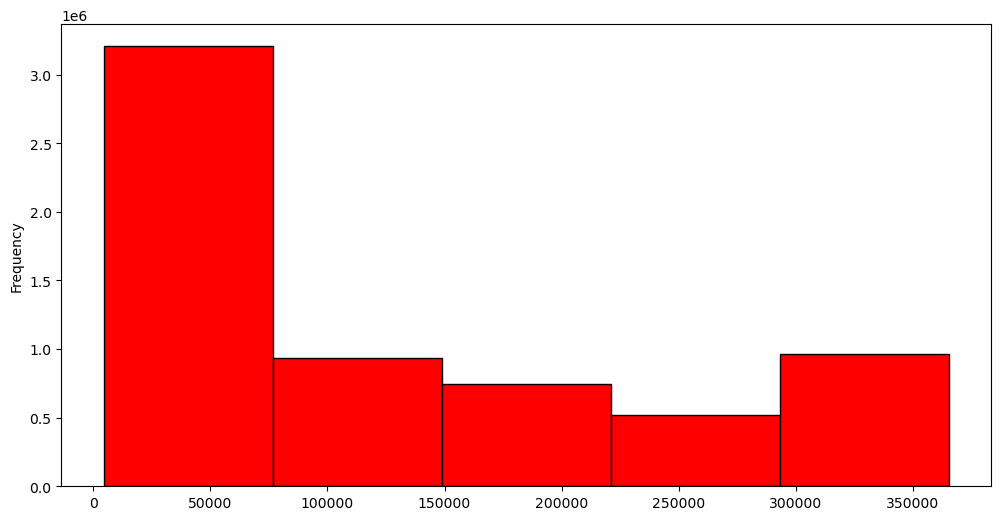

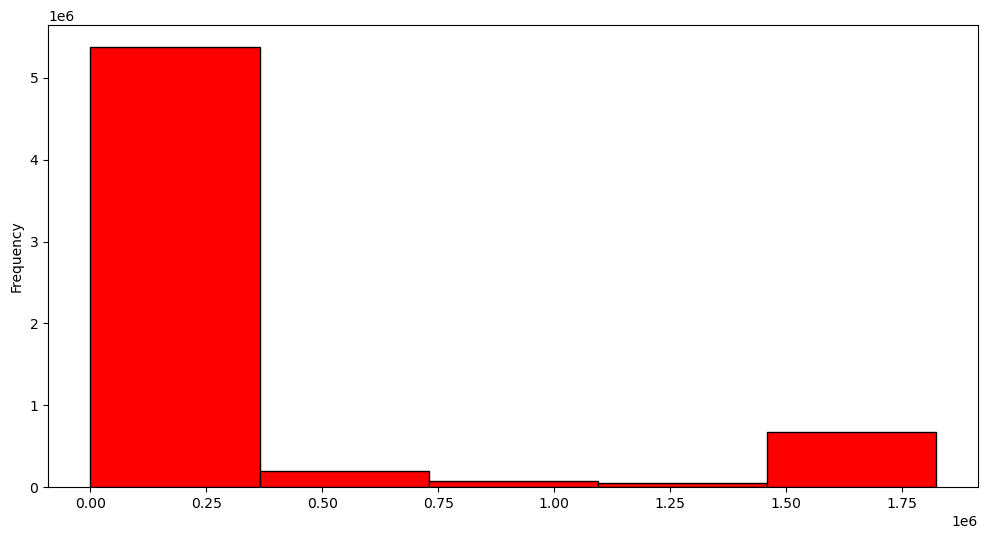

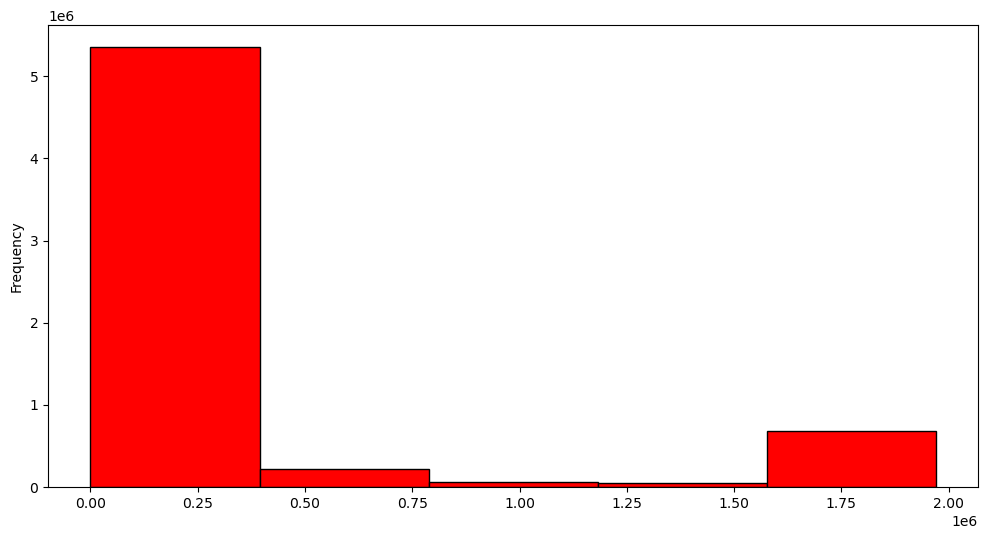

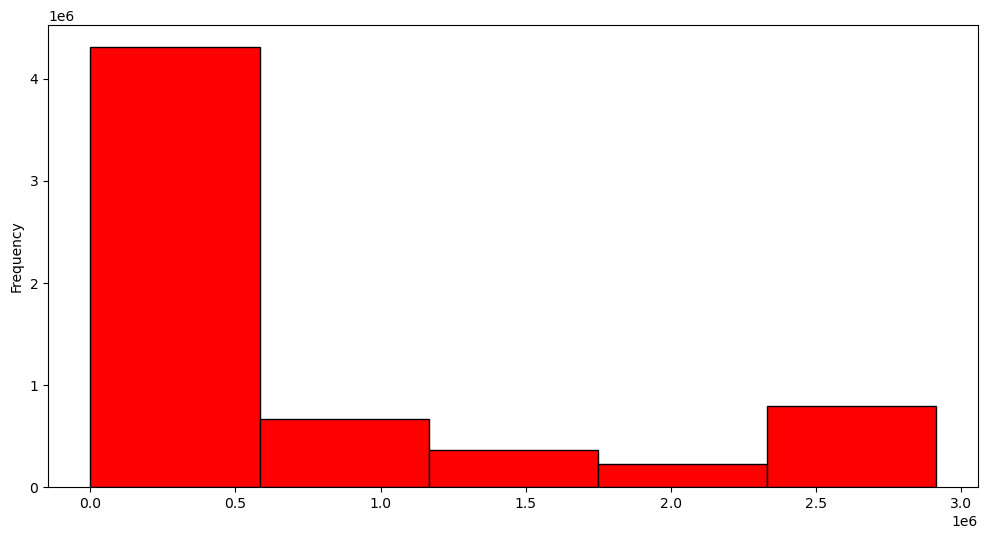

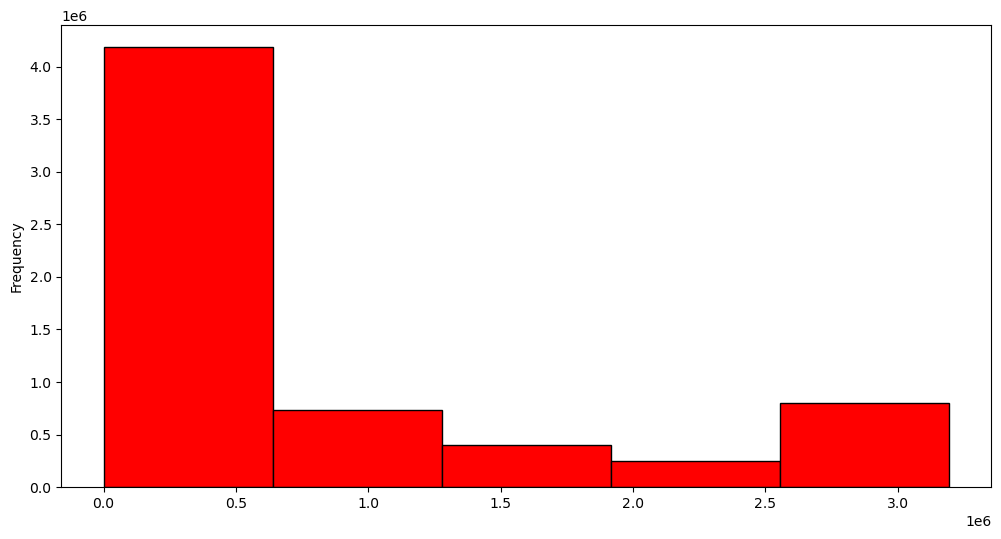

In [34]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='red',edgecolor='black')
    plt.show()

After outlier treatment

Amount ranges between 0-35 lakhs with more values ranging between 0-75,000.

OldbalanceOrg ranges around 0-18 lakh with more frequency around 0-375,000.

NewbalanceOrig ranges around 0-19 lakh with more frequency around 0-375,000.

OldbalanceDest ranges around 0-29 lakh with common values around 0-625,000.

NewbalanceDest ranges around 0-35 lakh with common values around 0-625,000.

#### Type

In [35]:
final_df["type"].value_counts()

type
PAYMENT     1050411
CASH_OUT     250786
CASH_IN      204984
DEBIT         28628
TRANSFER      24994
Name: count, dtype: int64

Here are the 5 different transactions 
PAYMENT , CASH_OUT , CASH_IN, DEBIT, TRANSFER

Lets visualize the transactions

<Axes: xlabel='type', ylabel='count'>

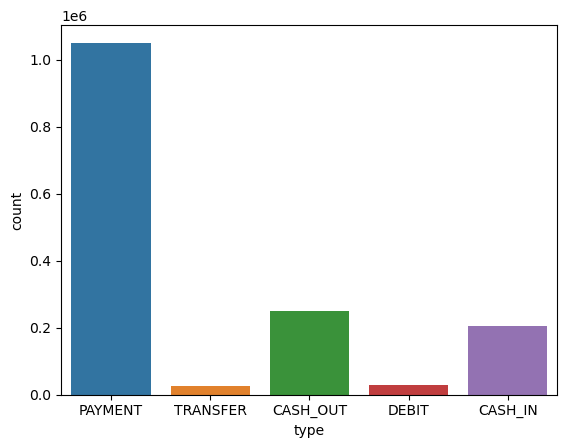

In [36]:
sns.countplot(data=final_df,x="type")

From the above chart we can see that most of the transactions.

**Now lets see how much amount each transaction holds

<Axes: xlabel='type', ylabel='amount'>

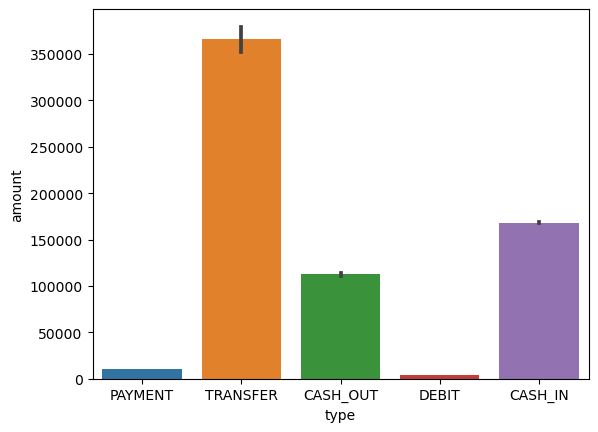

In [37]:
sns.barplot(x='type', y='amount', data=final_df)

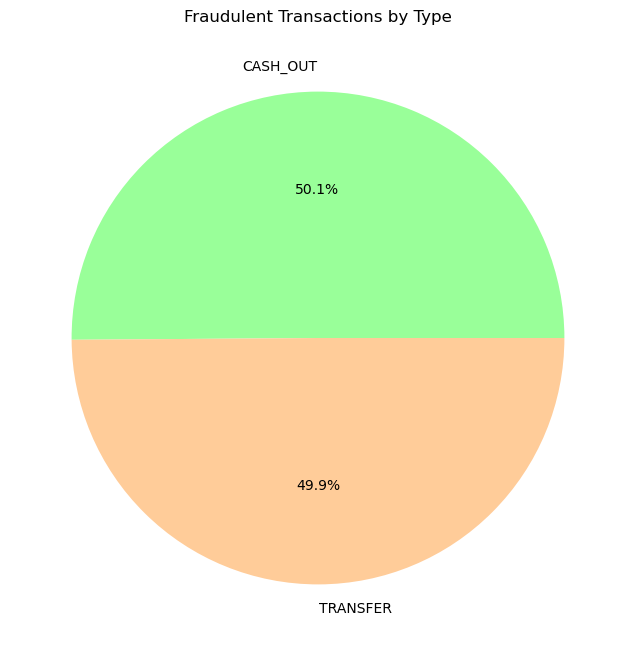

In [39]:
# Pie Chart 2: Fraudulent Transactions by Transaction Type
fraud_by_type = df[df['isFraud'] == 1]['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(fraud_by_type, labels=fraud_by_type.index, autopct='%1.1f%%', colors=['#99ff99','#ffcc99'])
plt.title('Fraudulent Transactions by Type')
plt.show()

#### Target variable value_counts

In [40]:
final_df["isFraud"].value_counts()

isFraud
0    1551590
1       8213
Name: count, dtype: int64

#### We can observe that, there is a very high bias towards Not Fraud type of transactions. We need to resample the data inorder to reduce the bias. Let's do undersampling.


In [41]:
class_counts = final_df['isFraud'].value_counts()
class_ratios = class_counts / class_counts.sum()
print("\nClass ratios:")
print(class_ratios)


Class ratios:
isFraud
0    0.994735
1    0.005265
Name: count, dtype: float64


In [42]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in final_df.select_dtypes(include="object").columns:
    final_df[i]=le.fit_transform(final_df[i])

In [43]:
final_df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,9839.64,170136.0,160296.36,0.0,0.00,0,0
1,3,1864.28,21249.0,19384.72,0.0,0.00,0,0
2,4,181.00,181.0,0.00,0.0,0.00,1,0
3,1,181.00,181.0,0.00,21182.0,0.00,1,0
4,3,11668.14,41554.0,29885.86,0.0,0.00,0,0
...,...,...,...,...,...,...,...,...
1559798,3,16055.00,42946.0,26891.00,0.0,0.00,0,0
1559799,3,6422.06,189855.5,183433.44,0.0,0.00,0,0
1559800,3,25794.28,30947.0,5152.72,0.0,0.00,0,0
1559801,1,363426.42,556480.8,193054.38,0.0,363426.42,0,0


In [44]:
X = final_df.drop('isFraud', axis=1)
Y = final_df['isFraud']

In [45]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,3,9839.64,170136.0,160296.36,0.0,0.00,0
1,3,1864.28,21249.0,19384.72,0.0,0.00,0
2,4,181.00,181.0,0.00,0.0,0.00,0
3,1,181.00,181.0,0.00,21182.0,0.00,0
4,3,11668.14,41554.0,29885.86,0.0,0.00,0
...,...,...,...,...,...,...,...
1559798,3,16055.00,42946.0,26891.00,0.0,0.00,0
1559799,3,6422.06,189855.5,183433.44,0.0,0.00,0
1559800,3,25794.28,30947.0,5152.72,0.0,0.00,0
1559801,1,363426.42,556480.8,193054.38,0.0,363426.42,0


In [46]:
print("Class distribution before SMOTE:")
print(Y.value_counts(normalize=True))

Class distribution before SMOTE:
isFraud
0    0.994735
1    0.005265
Name: proportion, dtype: float64


In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5,random_state=42)
X, Y = smote.fit_resample(X, Y)

In [48]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,3,9.839640e+03,1.701360e+05,160296.36,0.0,0.000000e+00,0
1,3,1.864280e+03,2.124900e+04,19384.72,0.0,0.000000e+00,0
2,4,1.810000e+02,1.810000e+02,0.00,0.0,0.000000e+00,0
3,1,1.810000e+02,1.810000e+02,0.00,21182.0,0.000000e+00,0
4,3,1.166814e+04,4.155400e+04,29885.86,0.0,0.000000e+00,0
...,...,...,...,...,...,...,...
2327380,1,2.737879e+06,2.737879e+06,0.00,0.0,2.737879e+06,0
2327381,4,7.444459e+06,7.444459e+06,0.00,0.0,0.000000e+00,0
2327382,1,9.180937e+04,9.180937e+04,0.00,0.0,9.180937e+04,0
2327383,4,8.220333e+06,8.220333e+06,0.00,0.0,0.000000e+00,0


In [49]:
print("Class distribution after SMOTE:")
print(Y.value_counts(normalize=True))

Class distribution after SMOTE:
isFraud
0    0.666667
1    0.333333
Name: proportion, dtype: float64


In [50]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X, Y = under_sampler.fit_resample(X, Y)

In [51]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
1085711,1,1.424812e+05,2.801050e+05,137623.84,1461450.28,1.603931e+06,0
570260,1,1.605527e+04,7.071500e+04,54659.73,181305.20,1.973605e+05,0
848662,3,1.297447e+04,6.591025e+05,646128.02,0.00,0.000000e+00,0
278806,3,4.086830e+03,1.122300e+04,7136.17,0.00,0.000000e+00,0
451890,1,3.119201e+04,2.067230e+05,175530.99,18216.63,4.940864e+04,0
...,...,...,...,...,...,...,...
2327380,1,2.737879e+06,2.737879e+06,0.00,0.00,2.737879e+06,0
2327381,4,7.444459e+06,7.444459e+06,0.00,0.00,0.000000e+00,0
2327382,1,9.180937e+04,9.180937e+04,0.00,0.00,9.180937e+04,0
2327383,4,8.220333e+06,8.220333e+06,0.00,0.00,0.000000e+00,0


In [52]:
print("Class distribution after Undersampling:")
print(Y.value_counts(normalize=True))

Class distribution after Undersampling:
isFraud
0    0.5
1    0.5
Name: proportion, dtype: float64


In [53]:
print(Y.value_counts())

isFraud
0    775795
1    775795
Name: count, dtype: int64


In [54]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
1085711,1,1.424812e+05,2.801050e+05,137623.84,1461450.28,1.603931e+06,0
570260,1,1.605527e+04,7.071500e+04,54659.73,181305.20,1.973605e+05,0
848662,3,1.297447e+04,6.591025e+05,646128.02,0.00,0.000000e+00,0
278806,3,4.086830e+03,1.122300e+04,7136.17,0.00,0.000000e+00,0
451890,1,3.119201e+04,2.067230e+05,175530.99,18216.63,4.940864e+04,0
...,...,...,...,...,...,...,...
2327380,1,2.737879e+06,2.737879e+06,0.00,0.00,2.737879e+06,0
2327381,4,7.444459e+06,7.444459e+06,0.00,0.00,0.000000e+00,0
2327382,1,9.180937e+04,9.180937e+04,0.00,0.00,9.180937e+04,0
2327383,4,8.220333e+06,8.220333e+06,0.00,0.00,0.000000e+00,0


In [55]:
X["isFraud"]=pd.DataFrame(Y)

In [56]:
for i in X.columns:
    X[i]=X[i].astype(int)

In [57]:
df_balanced=X
df_balanced=df_balanced.reset_index()

In [58]:
df_balanced.drop("index",axis=1,inplace=True)
df_balanced

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,142481,280105,137623,1461450,1603931,0,0
1,1,16055,70715,54659,181305,197360,0,0
2,3,12974,659102,646128,0,0,0,0
3,3,4086,11223,7136,0,0,0,0
4,1,31192,206723,175530,18216,49408,0,0
...,...,...,...,...,...,...,...,...
1551585,1,2737879,2737879,0,0,2737879,0,1
1551586,4,7444459,7444459,0,0,0,0,1
1551587,1,91809,91809,0,0,91809,0,1
1551588,4,8220333,8220333,0,0,0,0,1


In [59]:
correlation = df_balanced[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]].corr()

In [60]:
correlation

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
amount,1.000000,0.828093,0.260481,0.016119,0.356901
oldbalanceOrg,0.828093,1.000000,0.752886,0.021776,0.243829
newbalanceOrig,0.260481,0.752886,1.000000,0.017770,0.001347
oldbalanceDest,0.016119,0.021776,0.017770,1.000000,0.858658
newbalanceDest,0.356901,0.243829,0.001347,0.858658,1.000000


From this, we can understand that the following columns correlate very well.

oldbalanceorg and amount,

oldbalanceorg and newbalanceOrig ,

oldbalanceDest and newbalanceDest..

#### Find the correlation of all features with the target feature

In [61]:
df_balanced['isFraud'].sort_values(ascending=False)

775795     1
1034390    1
1034399    1
1034398    1
1034397    1
          ..
517196     0
517195     0
517194     0
517193     0
0          0
Name: isFraud, Length: 1551590, dtype: int32

Find out which type of transactions are more prone to Fraud.

<Axes: xlabel='type', ylabel='count'>

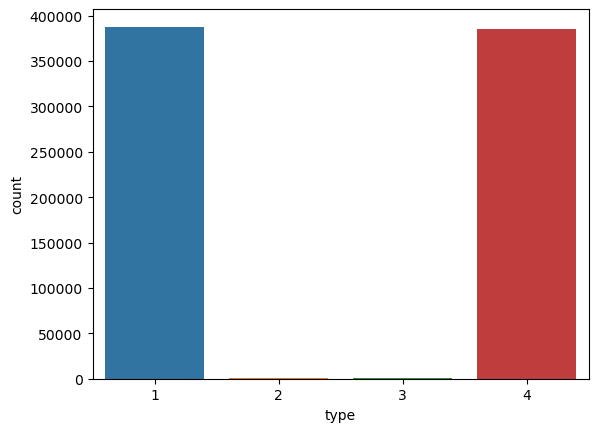

In [62]:
fraud_data = df_balanced[df_balanced['isFraud'] == 1]
legit_data = df_balanced[df_balanced['isFraud'] == 0]
sns.countplot(x='type',data=fraud_data)

It says that, transactions of type 1 and 4 i.e., `CASH_OUT` and `TRANFER` are more prone to fraud.

In [63]:
fraud_data['type'].value_counts()

type
1    387690
4    385612
2      1269
3      1224
Name: count, dtype: int64

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X = df_balanced.drop(['isFraud'], axis=1)
Y = df_balanced['isFraud']

bestfeatures = SelectKBest(score_func=f_classif, k='all')

fit = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [65]:
# Concatenate two dataframes for better understanding
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

# Sort features based on importance scores
featureScores = featureScores.sort_values(by='Score', ascending=False)
print(featureScores)

          Feature          Score
1          amount  271377.702436
2   oldbalanceOrg  107701.172961
5  newbalanceDest   50194.763941
0            type    9990.434497
4  oldbalanceDest    4843.119814
6  isFlaggedFraud    1011.315338
3  newbalanceOrig     747.902711


Text(0.5, 1.0, 'Feature Importance')

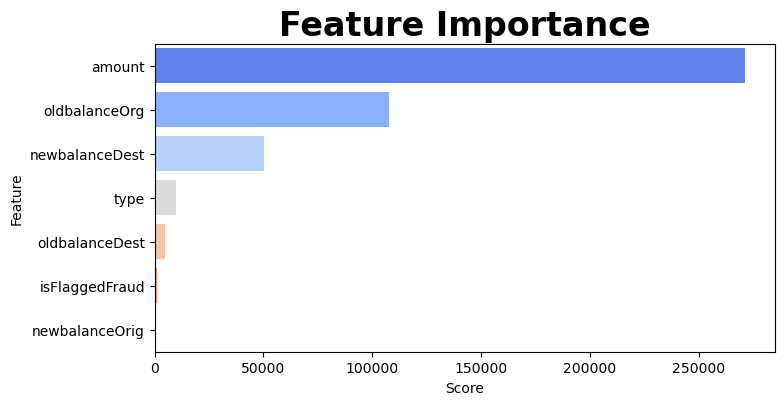

In [66]:
# Visualize the importance scores
fig, ax = plt.subplots(figsize=(8,4))
plot = sns.barplot(data=featureScores, x='Score', y='Feature', palette='coolwarm', linewidth=0.5, saturation=2,
                   orient='h')

plt.title('Feature Importance',
          fontsize=24,
          fontweight='bold')

In [67]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362914
1         16
Name: count, dtype: int64

From the total of 63 lakh records only 16 were assumed and flagged as fraud, which is actually a very low number. The actual fraud happend has a very higher value when compared to isFlaggedFraud column.

In [68]:
low_score_features = featureScores[featureScores['Score'] < 2000]
print(low_score_features)

          Feature        Score
6  isFlaggedFraud  1011.315338
3  newbalanceOrig   747.902711


In [69]:
features_to_drop = ['isFlaggedFraud',"newbalanceOrig"]
df_balanced = df_balanced.drop(features_to_drop, axis=1)

In [70]:
df_balanced.head()

,type,amount,oldbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,1,142481,280105,1461450,1603931,0
1,1,16055,70715,181305,197360,0
2,3,12974,659102,0,0,0
3,3,4086,11223,0,0,0
4,1,31192,206723,18216,49408,0


We don't need the columns `isFlaggedFraud` and newbalanceOrig as these are columns after a transaction happens. 

### Split the data into input and target datasets.

In [71]:
# Splitting data into features (X) and outcomes (y)
X = df_balanced.drop(["isFraud"], axis=1)
Y = df_balanced["isFraud"]

In [72]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

X_train.shape,X_test.shape, Y_train.shape, Y_test.shape

((1241272, 5), (310318, 5), (1241272,), (310318,))

## Standardization


Use StandardScaler() to standardize the features.

In [73]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [75]:
score_card = pd.DataFrame(columns=['Model', 'Precision Score', 'Recall Score', 'Accuracy Score', 'f1-score'])
from sklearn import metrics
def updateScoreCardTrain(score_card, model_name):
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Precision Score': [metrics.precision_score(Y_train, train_pred)],
        'Recall Score': [metrics.recall_score(Y_train, train_pred)],
        'Accuracy Score': [metrics.accuracy_score(Y_train, train_pred)],
        'f1-score': [metrics.f1_score(Y_train, train_pred)]
    })

    score_card = pd.concat([score_card, new_row], ignore_index=True)
    return score_card

In [76]:
def updateScoreCardTest(score_card, model_name):
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Precision Score': [metrics.precision_score(Y_test, test_pred)],
        'Recall Score': [metrics.recall_score(Y_test, test_pred)],
        'Accuracy Score': [metrics.accuracy_score(Y_test, test_pred)],
        'f1-score': [metrics.f1_score(Y_test, test_pred)]
    })

    score_card = pd.concat([score_card, new_row], ignore_index=True)
    return score_card

In [77]:
from sklearn.linear_model import  LogisticRegression

In [78]:
# Fitting the Model
LrModel=LogisticRegression()

LrModel.fit(X_train,Y_train)

# Model Predict
train_pred=LrModel.predict(X_train)
test_pred=LrModel.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'LogisticRegressionTrain')
score_card = updateScoreCardTest(score_card, 'LogisticRegressionTest')
score_card

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.922028,0.766177,0.850739,0.836909
1,LogisticRegressionTest,0.921902,0.765691,0.850225,0.836567


## 4.2 Decision Tree Model

In [79]:
from sklearn.tree import DecisionTreeClassifier

DCT=DecisionTreeClassifier()

# Fitting the Model
DCT.fit(X_train,Y_train)
# Model Predict
train_pred=DCT.predict(X_train)
test_pred=DCT.predict(X_test)


score_card = updateScoreCardTrain(score_card, 'DecisionTreeTrain')
score_card = updateScoreCardTest(score_card, 'DecisionTreeTest')
score_card

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.922028,0.766177,0.850739,0.836909
1,LogisticRegressionTest,0.921902,0.765691,0.850225,0.836567
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.998617,0.999524,0.999069,0.999070


## 4.3 Random Forest 

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(n_estimators=30,random_state=42, n_jobs=-1, oob_score=True)
rfc.fit(X_train,Y_train)

train_pred=rfc.predict(X_train)
test_pred=rfc.predict(X_test)

score_card = updateScoreCardTrain(score_card, 'RandomForestTrain')
score_card = updateScoreCardTest(score_card, 'RandomForestTest')
score_card

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.922028,0.766177,0.850739,0.836909
1,LogisticRegressionTest,0.921902,0.765691,0.850225,0.836567
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.998617,0.999524,0.999069,0.999070
4,RandomForestTrain,0.999974,1.000000,0.999987,0.999987
5,RandomForestTest,0.997739,0.999929,0.998830,0.998833


### ExtraTreesClassifier

In [81]:
from sklearn.ensemble import ExtraTreesClassifier
model_ExtraTrees = ExtraTreesClassifier(n_estimators=50,random_state=10)
model_ExtraTrees.fit(X_train,Y_train)

train_pred=model_ExtraTrees.predict(X_train)
test_pred=model_ExtraTrees.predict(X_test)
score_card = updateScoreCardTrain(score_card, 'ExtraTreeTrain')
score_card = updateScoreCardTest(score_card, 'ExtraTreeTest')
score_card

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.922028,0.766177,0.850739,0.836909
1,LogisticRegressionTest,0.921902,0.765691,0.850225,0.836567
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.998617,0.999524,0.999069,0.999070
4,RandomForestTrain,0.999974,1.000000,0.999987,0.999987
5,RandomForestTest,0.997739,0.999929,0.998830,0.998833
6,ExtraTreeTrain,1.000000,1.000000,1.000000,1.000000
7,ExtraTreeTest,0.996894,0.999781,0.998331,0.998335


### Ada Boost Classifier

In [82]:
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=
                                  DecisionTreeClassifier(random_state=10),
                                  n_estimators=70,
                              random_state=10)

model_AdaBoost.fit(X_train,Y_train)
train_pred=model_AdaBoost.predict(X_train)
test_pred=model_AdaBoost.predict(X_test)
score_card = updateScoreCardTrain(score_card, 'AdaBoostTrain')
score_card = updateScoreCardTest(score_card, 'AdaBoostTest')
score_card

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.922028,0.766177,0.850739,0.836909
1,LogisticRegressionTest,0.921902,0.765691,0.850225,0.836567
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.998617,0.999524,0.999069,0.999070
4,RandomForestTrain,0.999974,1.000000,0.999987,0.999987
5,RandomForestTest,0.997739,0.999929,0.998830,0.998833
6,ExtraTreeTrain,1.000000,1.000000,1.000000,1.000000
7,ExtraTreeTest,0.996894,0.999781,0.998331,0.998335
8,AdaBoostTrain,1.000000,1.000000,1.000000,1.000000
9,AdaBoostTest,0.998649,0.999537,0.999091,0.999093


### XGB Classifier

In [83]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=80,
                              random_state=10)

model_XGBoost.fit(X_train,Y_train)
train_pred=model_XGBoost.predict(X_train)
test_pred=model_XGBoost.predict(X_test)
score_card = updateScoreCardTrain(score_card, 'XGBoostTrain')
score_card = updateScoreCardTest(score_card, 'XGBoostTest')
score_card

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.922028,0.766177,0.850739,0.836909
1,LogisticRegressionTest,0.921902,0.765691,0.850225,0.836567
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.998617,0.999524,0.999069,0.999070
4,RandomForestTrain,0.999974,1.000000,0.999987,0.999987
5,RandomForestTest,0.997739,0.999929,0.998830,0.998833
6,ExtraTreeTrain,1.000000,1.000000,1.000000,1.000000
7,ExtraTreeTest,0.996894,0.999781,0.998331,0.998335
8,AdaBoostTrain,1.000000,1.000000,1.000000,1.000000
9,AdaBoostTest,0.998649,0.999537,0.999091,0.999093


In [84]:
df_balanced.columns

Index(['type', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'newbalanceDest',
       'isFraud'],
      dtype='object')

### 4.4 Deep Learing Models

In [85]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [86]:
model = Sequential()

In [87]:
X_train.shape,Y_train.shape

((1241272, 5), (1241272,))

In [88]:
# building a linear stack of layers with the sequential model
model = Sequential()


# hidden layer
model.add(Dense(128,activation = "relu", input_dim=5)) # input connected
model.add(Dense(64, activation = 'relu')) # hidden
model.add(Dense(32, activation = 'relu'))# Hidden
model.add(Dense(16, activation = 'relu'))#Hidden


# output layer
model.add(Dense(1, activation = "sigmoid"))

In [89]:
# looking at the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:

# compiling the sequential model
model.compile(optimizer= 'adam',loss= "binary_crossentropy", metrics= ['accuracy'])


# Early Stopping Callback
earlystopping = EarlyStopping(monitor='val_loss', patience=5)


# training the model for 100 epochs
h_callback = model.fit(X_train, Y_train, batch_size = 16, epochs = 2, validation_data=(X_test, Y_test), callbacks=[earlystopping])

Epoch 1/2
77580/77580 ━━━━━━━━━━━━━━━━━━━━ 218s 2ms/step - accuracy: 0.9630 - loss: 0.0923 - val_accuracy: 0.9815 - val_loss: 0.0552
Epoch 2/2
77580/77580 ━━━━━━━━━━━━━━━━━━━━ 158s 2ms/step - accuracy: 0.9797 - loss: 0.0561 - val_accuracy: 0.9803 - val_loss: 0.0536


In [91]:
test_pred = model.predict(X_test)
test_pred = np.round(test_pred)
train_pred=model.predict(X_train)
train_pred = np.round(train_pred)
score_card = updateScoreCardTrain(score_card, 'ANNTrain')
score_card = updateScoreCardTest(score_card, 'ANNTest')
score_card

9698/9698 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step
38790/38790 ━━━━━━━━━━━━━━━━━━━━ 46s 1ms/step


,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,LogisticRegressionTrain,0.922028,0.766177,0.850739,0.836909
1,LogisticRegressionTest,0.921902,0.765691,0.850225,0.836567
2,DecisionTreeTrain,1.000000,1.000000,1.000000,1.000000
3,DecisionTreeTest,0.998617,0.999524,0.999069,0.999070
4,RandomForestTrain,0.999974,1.000000,0.999987,0.999987
5,RandomForestTest,0.997739,0.999929,0.998830,0.998833
6,ExtraTreeTrain,1.000000,1.000000,1.000000,1.000000
7,ExtraTreeTest,0.996894,0.999781,0.998331,0.998335
8,AdaBoostTrain,1.000000,1.000000,1.000000,1.000000
9,AdaBoostTest,0.998649,0.999537,0.999091,0.999093


In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551590 entries, 0 to 1551589
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   type            1551590 non-null  int32
 1   amount          1551590 non-null  int32
 2   oldbalanceOrg   1551590 non-null  int32
 3   oldbalanceDest  1551590 non-null  int32
 4   newbalanceDest  1551590 non-null  int32
dtypes: int32(5)
memory usage: 29.6 MB


In [93]:
import pickle

In [94]:
filename='new_trained_model.sav'
pickle.dump(model_XGBoost,open(filename,'wb'))

In [95]:
loaded_model=pickle.load(open('new_trained_model.sav','rb'))

In [96]:
import sklearn
print(sklearn.__version__)

1.2.2


In [135]:
for i in X.columns:
    print(X[i].value_counts())

type
3    526695
1    510819
4    396073
0    102579
2     15424
Name: count, dtype: int64
amount
10000000    26493
0             607
32382         102
173            93
63             93
            ...  
491269          1
595179          1
1673291         1
612369          1
8220333         1
Name: count, Length: 615514, dtype: int64
oldbalanceOrg
10000000    13000
0            2152
32382          99
429257         81
1165187        80
            ...  
6545697         1
3075843         1
539898          1
1272755         1
8220333         1
Name: count, Length: 726796, dtype: int64
oldbalanceDest
0         1134341
1              70
2              63
3              33
189            18
           ...   
26796           1
192788          1
78536           1
752133          1
277278          1
Name: count, Length: 354754, dtype: int64
newbalanceDest
0           992291
10000000      4935
1224912        238
32382           43
60519           42
             ...  
16806197         1
93115

In [136]:
X

,type,amount,oldbalanceOrg,oldbalanceDest,newbalanceDest
0,1,142481,280105,1461450,1603931
1,1,16055,70715,181305,197360
2,3,12974,659102,0,0
3,3,4086,11223,0,0
4,1,31192,206723,18216,49408
...,...,...,...,...,...
1551585,1,2737879,2737879,0,2737879
1551586,4,7444459,7444459,0,0
1551587,1,91809,91809,0,91809
1551588,4,8220333,8220333,0,0


In [139]:
df_balanced.tail(30)

,type,amount,oldbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
1551560,4,348770,348770,0,0,1
1551561,1,5888061,5888061,340110,6228172,1
1551562,1,759858,759858,38693,798551,1
1551563,4,9092924,9092924,0,0,1
1551564,1,2107541,2107541,300448,3020731,1
1551565,1,9616,9616,745901,755517,1
1551566,4,478677,478677,0,0,1
1551567,1,9383909,9383909,288820,9672729,1
1551568,1,2196974,2196974,1368791,3565766,1
1551569,4,10000000,11841857,0,0,1
